<a href="https://colab.research.google.com/github/mbhuiyan1/Deep-Learning-Researches/blob/main/image_classification_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential # Sequential API let's you create a model layer by layer. 

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import numpy as np 


**Conecting this notebook with google-drive**


In [2]:
from google.colab import drive
drive.mount('/content/drive')
# For accessing files in google drive.


Mounted at /content/drive


**Bring in the data into this notebook**

In [3]:
# Our image datastes have different dimensions, so we define our preferred dimension
img_width = 150
img_height = 150

train_data_dir = '/content/drive/MyDrive/ML-image-classification/image_data/training'
validation_data_dir = '/content/drive/MyDrive/ML-image-classification/image_data/validation'
train_samples = 20 
validation_samples = 10
epochs = 10
batch_size = 10   

**Define a simple CNN model**

In [4]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3))) 
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))  
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


**Data Augmentation**

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2, # counterclokwise direction
    zoom_range=0.2, # randomly zooming inside the images
    horizontal_flip=True) # Randomly flips horizontally


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 198 images belonging to 2 classes.


In [9]:

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [10]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

10
1.0


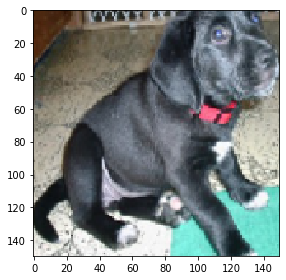

1.0


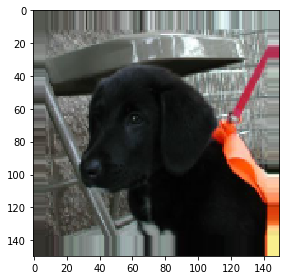

1.0


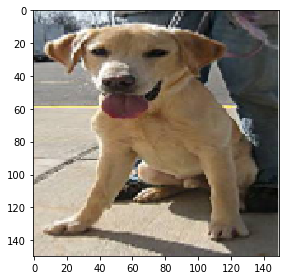

0.0


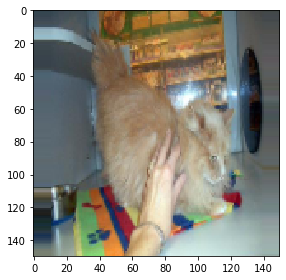

0.0


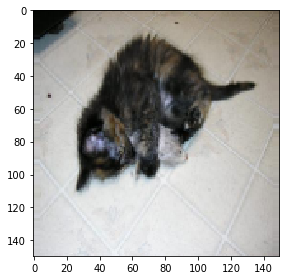

0.0


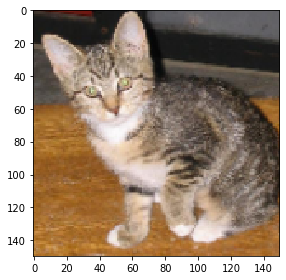

0.0


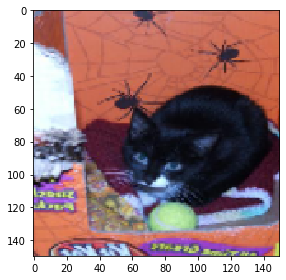

0.0


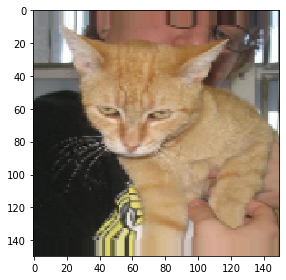

1.0


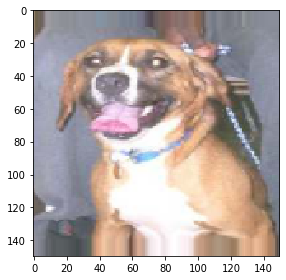

0.0


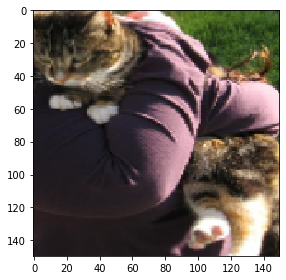

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next() # The next() function returns the next item in an iterator.
# Now if I run this code it will give me 10 images of dog and cat since batch size =10. If I run the code again it will give me 10 different images from next batch.

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
20/20 [==============================] - 9s 434ms/step - loss: 0.6641 - accuracy: 0.5758 - val_loss: 0.6865 - val_accuracy: 0.5300
Epoch 2/10
20/20 [==============================] - 6s 288ms/step - loss: 0.6834 - accuracy: 0.5707 - val_loss: 0.6600 - val_accuracy: 0.6500
Epoch 3/10
20/20 [==============================] - 6s 289ms/step - loss: 0.6980 - accuracy: 0.5556 - val_loss: 0.6811 - val_accuracy: 0.6400
Epoch 4/10
20/20 [==============================] - 6s 292ms/step - loss: 0.6575 - accuracy: 0.6212 - val_loss: 0.7496 - val_accuracy: 0.5500
Epoch 5/10
20/20 [==============================] - 6s 290ms/step - loss: 0.6726 - accuracy: 0.6111 - val_loss: 0.6671 - val_accuracy: 0.5700
Epoch 6/10
20/20 [==============================] - 6s 284ms/step - loss: 0.6533 - accuracy: 0.6162 - val_loss: 0.6640 - val_accuracy: 0.6700
Epoch 7/10
20/20 [==============================] - 6s 287ms/step - loss: 0.6441 - accuracy: 0.6212 - val_loss: 0.6584 - val_accuracy: 0.6000
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


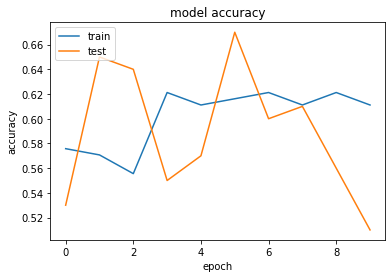

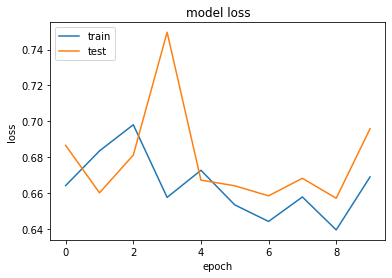

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
import operator
from pathlib import Path
import logging, os
from google.colab import files
from keras.preprocessing import image


[4.1870302e-11]


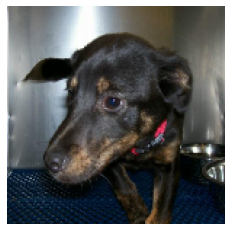

3285.jpg: cat

[0.]


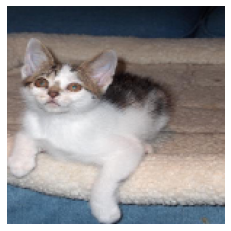

2658.jpg: cat

[1.]


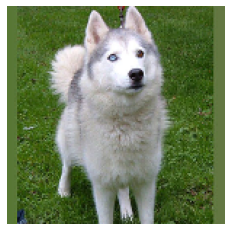

310.jpg: dog

[0.]


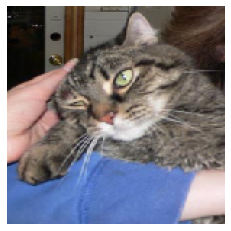

234.jpg: cat

[1.]


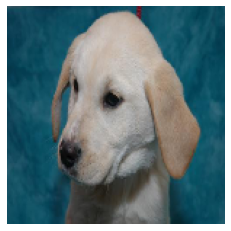

2994.jpg: dog

[7.2542553e-34]


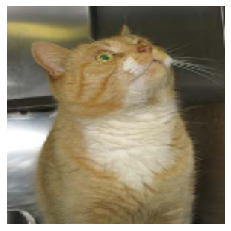

2512.jpg: cat

[0.]


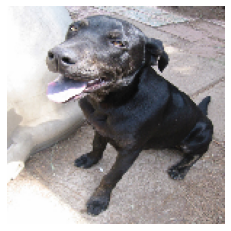

236.jpg: cat

[0.]


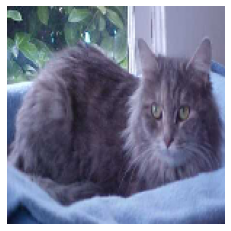

3111.jpg: cat

Total Dogs : 2
Total Cats : 6


In [19]:
#predict from test repository
dog_counter = 0 
cat_counter  = 0
image_path = "/content/drive/MyDrive/ML-image-classification/image_data/test/"

images = []
    
# load all images into a list
for im in os.listdir(image_path):
        img = os.path.join(image_path, im)
        img = image.load_img(img, target_size=(img_width, img_height)) # this is a PIL image
        x = image.img_to_array(img) # convert the PIl image to 3d tensor with shape (148, 148, 3)
        x = np.expand_dims(x, axis=0) # # convert the  3d tensor tp 4D tesnor with shape (1, 148, 148, 3)

        images = np.vstack([x]) #all the images in a stack
        classes = model.predict(x)

        print(classes[0])
        plt.axis("off")
        plt.imshow(img)
        plt.show()
        
        if classes[0] <= 0.5:
          print(im + ": " + 'cat\n')
          cat_counter += 1
        else:
          print(im + ": " + 'dog\n' )
          dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)